# **Análise de Séries Temporais**
### A técnica de análise de séries temporais trabalha com a coleção de registros ou observações que foram medidos durante um determinado intervalo de tempo. As séries temporais possuem grande importância para a previsão de comportamentos futuros o que por sua vez contribui positivamente para as tomadas de decisão, e também para a percepeção de tendências ao longo do tempo.

### Os dados escolhidos para fazer as análises de séries temporais foi o [Dados Históricos Diários do Preço do Ouro](https://www.kaggle.com/datasets/psycon/daily-gold-price-historical-data) fornecido pelo Kaggle, que apresenta imformações sobre a negociação do Ouro na bolsa de valores.


#**Objetivos principais**

### No mercado de capitais o ouro é um ativo que possui uma volatilidade moderada ,fazendo com que seus preços não oscilem muito, podendo trazer um certo 'equilíbrio' a carteira dos investidores que compram este ativo. E o meu principal foco nessa análise é identificar algumas tendências e movimentações ao longo série temporal.








## **Detalhes do dataset - Índice e colunas**
### **Início**: 2000/01/04
### **Término**: 2022/09/02
### **Colunas**:
### **Open**: Preço de abertura do ativo.
### **High**: Preço máximo atingido pelo o ativo.
### **Low**: Preço minímo atingido pelo o ativo.
### **Close**: Preço de fechamneto do ativo.
### **Volume**: A quantidade negociações realizadas no dia.
### **Currency**: Moeda em que as negociações foram feitas.


In [ ]:
# IMPORTANDO BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Carregando o arquivo, definindo a data como índice e convertendo para datetime
df = pd.read_csv('/content/gold (1).csv', index_col='Date', parse_dates=['Date'])

In [ ]:
# VISUALIZANDO AS 10 PRIMEIRAS LINHAS DO DATASET.
df.head(10)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2000-01-04,289.5,289.5,280.0,283.7,21621,USD
2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2000-01-06,281.6,282.8,280.2,282.4,19055,USD
2000-01-07,282.5,284.5,282.0,282.9,11266,USD
2000-01-10,282.4,283.9,281.8,282.7,30603,USD
2000-01-11,282.4,285.3,281.9,284.4,13500,USD
2000-01-12,284.5,285.0,282.5,283.7,17841,USD
2000-01-13,283.5,285.9,282.9,285.1,12171,USD
2000-01-14,285.2,285.6,284.0,284.9,32339,USD


In [ ]:
# DESCRIÇÃO ESTATÍSTICA DOS DADOS
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,5703.0,1040.382816,518.733377,256.6,459.85,1188.8,1381.40,2076.4
High,5703.0,1048.339181,522.353946,259.4,463.90,1198.0,1392.75,2089.2
Low,5703.0,1031.863169,514.455903,255.1,457.45,1179.7,1368.10,2049.0
Close,5703.0,1040.298282,518.524020,256.6,460.50,1188.7,1383.05,2069.4
Volume,5703.0,139141.669297,102537.449058,0.0,52938.50,126006.0,193109.00,816531.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f15200c87f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f15200c8d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f15200c8550>,
 'medians': [<matplotlib.lines.Line2D at 0x7f15200c9270>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f15200c94b0>,
 'means': []}

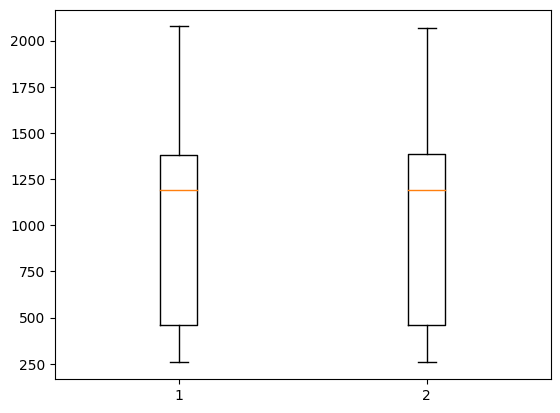

In [ ]:
# DISTRIBUIÇÃO DOS PREÇOS DE ABERTURA E FECHAMENTO COM BOX PLOT
plt.boxplot(df[['Open', 'Close']])

In [ ]:
# verificando valores nulos e duplicados
df.isnull().sum()
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5703 entries, 2000-01-04 to 2022-09-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      5703 non-null   float64
 1   High      5703 non-null   float64
 2   Low       5703 non-null   float64
 3   Close     5703 non-null   float64
 4   Volume    5703 non-null   int64  
 5   Currency  5703 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 311.9+ KB


## Observando tendências com Média Móvel Simples(MMS)
### A MMS nada mais é do que a média iniciada em um período anterior até o período observado. O período observado pode ser 15 dias, 30 dias, 4 meses e até 1 ano e vai depender dos objetivos de cada um.

### A grande sacada da Média Móvel Simples é que conforme o tempo avança e novos resultados vão surgindo a média se movimenta junto mantendo sempre a base amostral dos períodos observados.



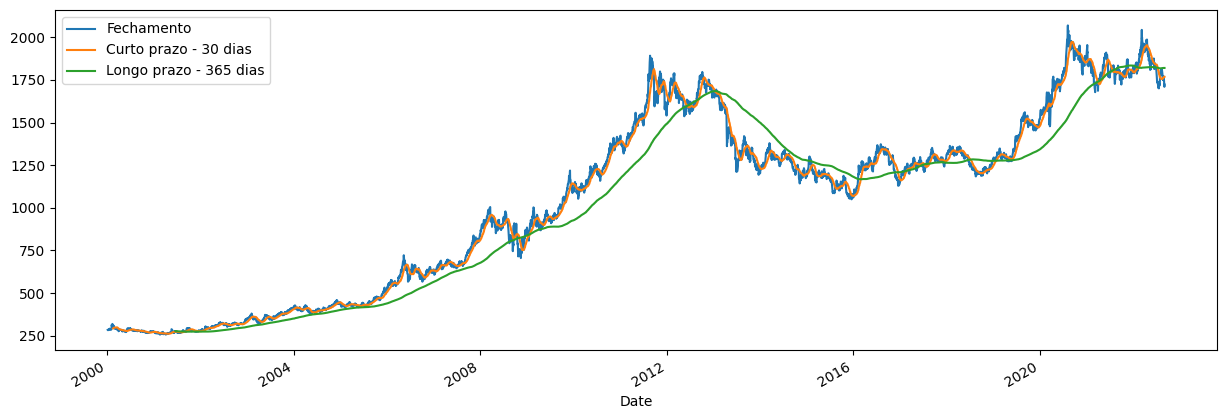

In [ ]:
df['curto_prazo'] = df['Close'].rolling(30).mean()
df['longo_prazo'] = df['Close'].rolling(365).mean()

plt.figure(figsize=(15,5))

df['Close'].plot(label='Fechamento')
df['curto_prazo'].plot(label='Curto prazo - 30 dias')
df['longo_prazo'].plot(label='Longo prazo - 365 dias')
plt.legend()

## Sazonalidade
### Nas séries temporais a sazonalidade compreende os comportamentos e padrões que ocorrem em intervalos de tempo específicos.
### Para construir o código é bem simples, retira-se somente os ruídos da série temporal, pois com eles não é possível identificar os padrões. Para eliminar os ruídos utilizei o comando diff() do pandas, que utiliza a diferença do primeiro registro com o registro sucessor

<Axes: xlabel='Date'>

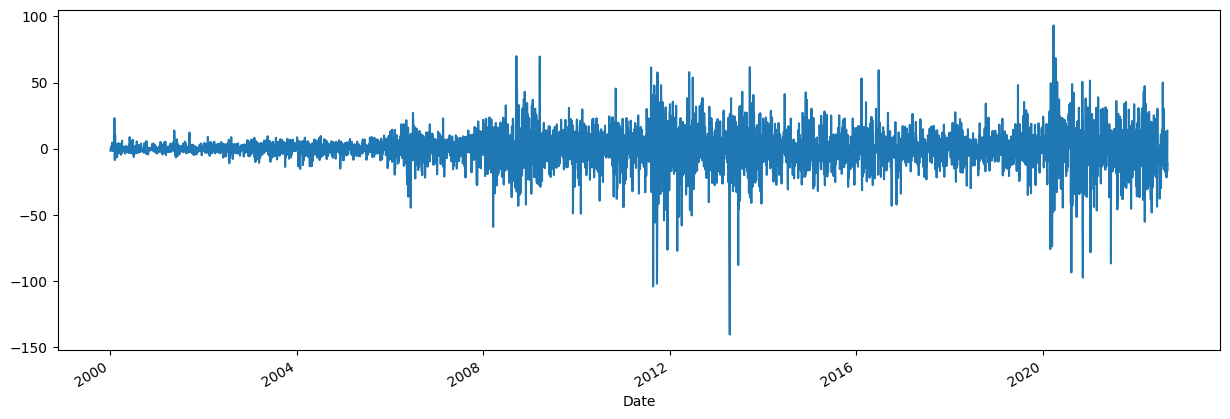

In [ ]:
df['Close'].diff().plot(figsize=(15,5))

### Como a série temporal é bastante extensa a visualização completa se torna um pouco confusa. Abaixo utilizei um filtro colocando a data de início e fim.

####Sazonalidade dos primeiros 5 anos

<Axes: xlabel='Date'>

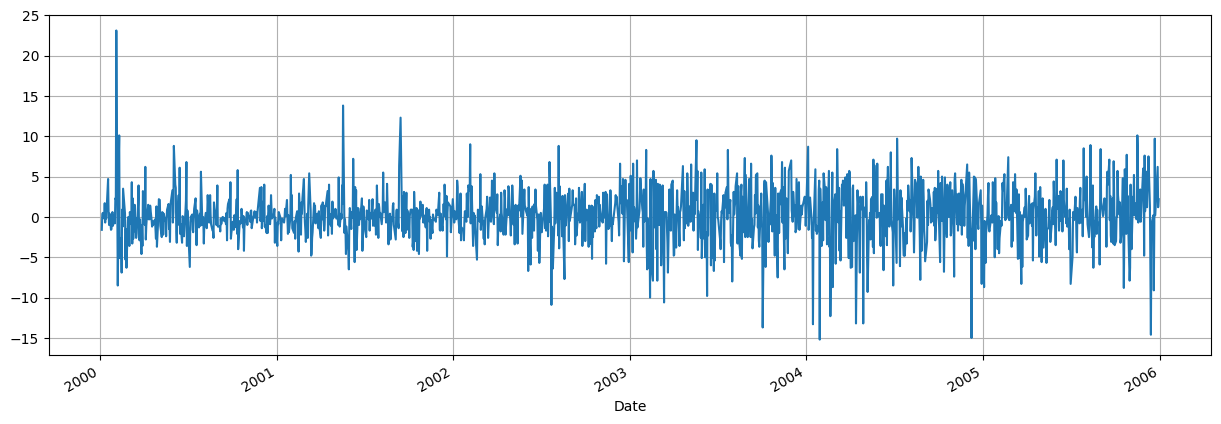

In [ ]:
data_filtrada = (df.index.year >= 2000 ) & (df.index.year <= 2005)
df['Close'][data_filtrada].diff().plot(figsize=(15,5), grid=True)

####Observando o gráfico dos primeiros 5 anos dos valores de fechamento, é notório que a variação sazonal de preços é bastante estável mantendo-se entre 5 e -5 em boa parte observada, chegando a passar de -10 a partir de 2003 em diante.

####Sazonalidade dos últimos 5 anos

<Axes: xlabel='Date'>

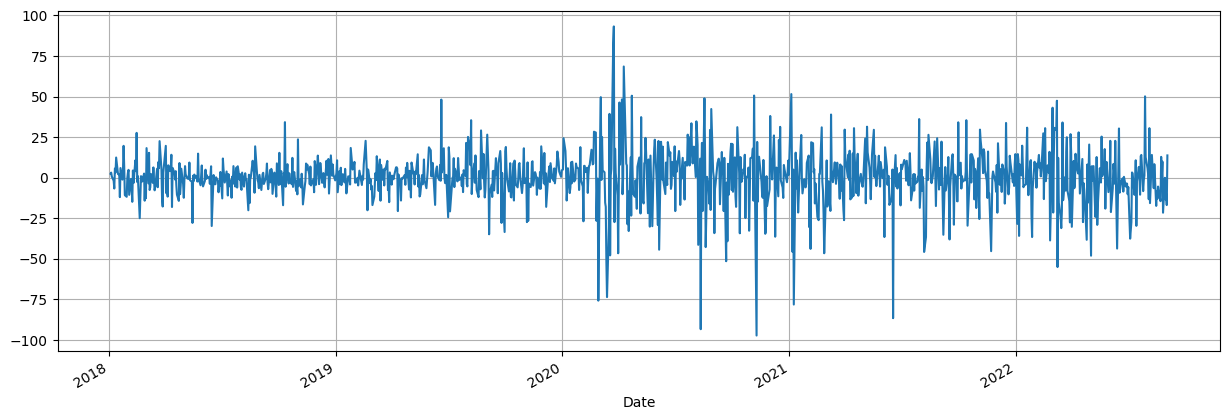

In [ ]:
data_filtrada = (df.index.year >= 2018 ) & (df.index.year <= 2022)
df['Close'][data_filtrada].diff().plot(figsize=(15,5), grid=True)

####E nos últimos 5 anos observados o valor ainda se mantém estável sem variações bruscas durante 2018 e 2019, mas quando começa 2020 o valor sofre uma forte queda atingindo -75 e depois forma um pico passando de 75, o que poderia ser um reflexo do surto da Covid-19 já que o ouro é um ativo muito conhecido para ser utilizado como reserva de valor

##Analisando a estacionariedade da série temporal
###Em séries temporais a estacionariedade mostra como propriedades estatísticas, como a média e a variância em específico, se comportam independentemente do tempo. Existem duas definições de estacionariedade nas séries temporais, estacionariedade fraca e forte. Uma série é considerada fraca(não estacionária) quando as propriedades estatísticas apresentam tendências crescentes ao longo do tempo, seja ela linear positiva ou linear negativa. Na estacionariedade forte(estacionária) as propriedades não apresentam tendências fazendo com que se mantenha constantes durante todo o período.

###Para verificar o nível de estacionariedade da série temporal utilizarei novamente as janelas móveis para medir a média e o desvio-padrão dentro do intervalo de 180 dias.

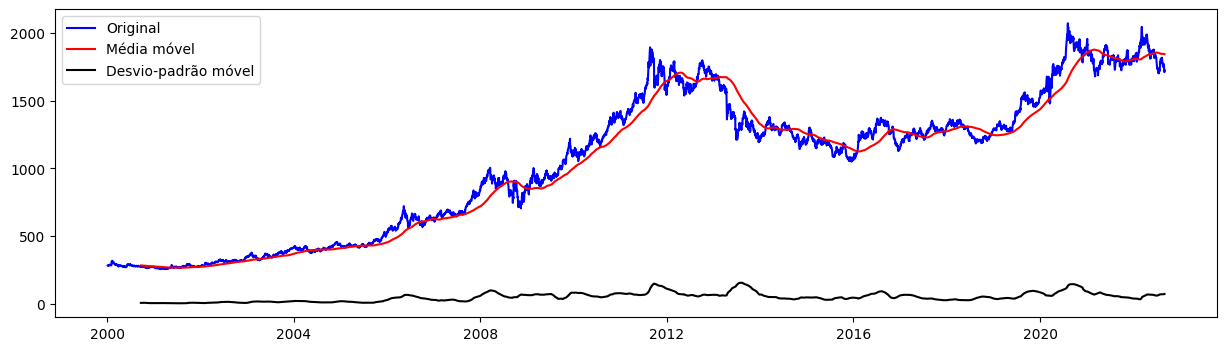

In [ ]:
rol_mean = df['Close'].rolling(window=180).mean()
rol_std = df['Close'].rolling(window=180).std()

plt.figure(figsize=(15,4))
plt.plot(df['Close'], color='blue',label='Original')
plt.plot(rol_mean, color='red', label='Média móvel')
plt.plot(rol_std, color='black', label = 'Desvio-padrão móvel')
plt.legend()

###Olhando o gráfico percebe-se que a média e o desvio-padrão não são constantes, o que é considerado uma estacionariedade fraca(não estacionária).
###No entanto é possível converter uma série não estacionária para estacionária simplesmente eliminando as tendências e sazonalidades presentes na série.

###1. Convertendo valores para logaritmos.





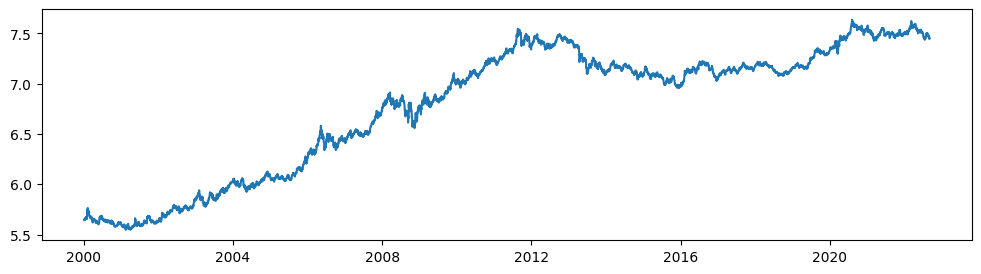

In [ ]:
res_log = np.log(df['Close'])
plt.figure(figsize=(12,3))
plt.plot(res_log)

###2. Para eliminar tendência e sazonalidade utilizarei uma técnica chamada de **Diferenciação**, que faz a diferença entre o instante presente com o instante anterior.

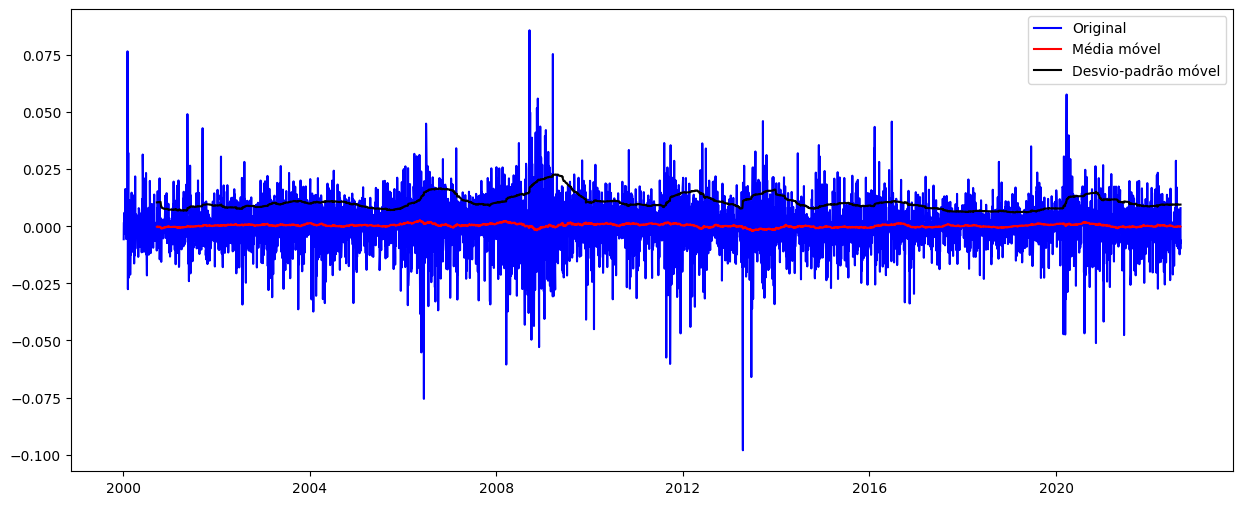

In [ ]:

res_dif = res_log - res_log.shift()

rol_mean = res_dif.rolling(window=180).mean()
rol_std = res_dif.rolling(window=180).std()

plt.figure(figsize=(15,6))
plt.plot(res_dif, color='blue',label='Original')
plt.plot(rol_mean, color='red', label='Média móvel')
plt.plot(rol_std, color='black', label = 'Desvio-padrão móvel')
plt.legend()

### E após as alterações, a série já não apresenta mais sinais de tendências, tornando-se então estacionária. E é bom lembrar que não existe estacionariedade perfeita e o resultado apresentado acima é o que melhor se aproxima.